In [1]:
import plotly.graph_objects as go
import pandas as pd

In [4]:
df = pd.read_csv("flask_app/dashboard/mta/data.csv")

In [12]:
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,month-end,year,month
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,2020-03-31,2020,3
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,2020-03-31,2020,3
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,2020-03-31,2020,3
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,2020-03-31,2020,3
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,2020-03-31,2020,3


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df["month-end"] = df["Date"] + pd.tseries.offsets.MonthEnd(0)
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [25]:
cols = ["Subways: Total Estimated Ridership", "Buses: Total Estimated Ridership", "LIRR: Total Estimated Ridership",
        "Metro-North: Total Estimated Ridership", "Access-A-Ride: Total Scheduled Trips", "Bridges and Tunnels: Total Traffic",
        "Staten Island Railway: Total Estimated Ridership"]

In [31]:
df_month = df.groupby("month-end", as_index=False)[cols].agg(["sum", "mean"])
df_month.head()

month-end Subways: Total Estimated Ridership                \
                                            sum          mean   
0 2020-03-31                           73625223  2.375007e+06   
1 2020-04-30                           11730474  3.910158e+05   
2 2020-05-31                           15275851  4.927694e+05   
3 2020-06-30                           23928304  7.976101e+05   
4 2020-07-31                           32508961  1.048676e+06   

  Buses: Total Estimated Ridership                \
                               sum          mean   
0                         31871784  1.028122e+06   
1                           471515  1.571717e+04   
2                           410704  1.324852e+04   
3                           658374  2.194580e+04   
4                           828108  2.671316e+04   

  LIRR: Total Estimated Ridership                 \
                              sum           mean   
0                         3625224  116942.709677   
1                          217333    7244.433333   
2                          501928   16191.225806   
3                         1196635   39887.833333   
4                         1788497   57693.451613   

  Metro-North: Total Estimated Ridership                 \
                                     sum           mean   
0                                3890767  125508.612903   
1                                 244337    8144.566667   
2                                 335868   10834.451613   
3                                 617791   20593.033333   
4                                 914255   29492.096774   

  Access-A-Ride: Total Scheduled Trips                \
                                   sum          mean   
0                               558330  18010.645161   
1                               181852   6061.733333   
2                               236658   7634.129032   
3                               346437  11547.900000   
4                               445334  14365.612903   

  Bridges and Tunnels: Total Traffic                 \
                                 sum           mean   
0                           19235070  620486.129032   
1                            9916205  330540.166667   
2                           15211624  490697.548387   
3                           20315413  677180.433333   
4                           23662900  763319.354839   

  Staten Island Railway: Total Estimated Ridership               
                                               sum         mean  
0                                           200584  6470.451613  
1                                            19677   655.900000  
2                                            23457   756.677419  
3                                            41174  1372.466667  
4                                            62300  2009.677419

In [36]:
df_month.columns

MultiIndex([(                                       'month-end',     ''),
            (              'Subways: Total Estimated Ridership',  'sum'),
            (              'Subways: Total Estimated Ridership', 'mean'),
            (                'Buses: Total Estimated Ridership',  'sum'),
            (                'Buses: Total Estimated Ridership', 'mean'),
            (                 'LIRR: Total Estimated Ridership',  'sum'),
            (                 'LIRR: Total Estimated Ridership', 'mean'),
            (          'Metro-North: Total Estimated Ridership',  'sum'),
            (          'Metro-North: Total Estimated Ridership', 'mean'),
            (            'Access-A-Ride: Total Scheduled Trips',  'sum'),
            (            'Access-A-Ride: Total Scheduled Trips', 'mean'),
            (              'Bridges and Tunnels: Total Traffic',  'sum'),
            (              'Bridges and Tunnels: Total Traffic', 'mean'),
            ('Staten Island Railway: T

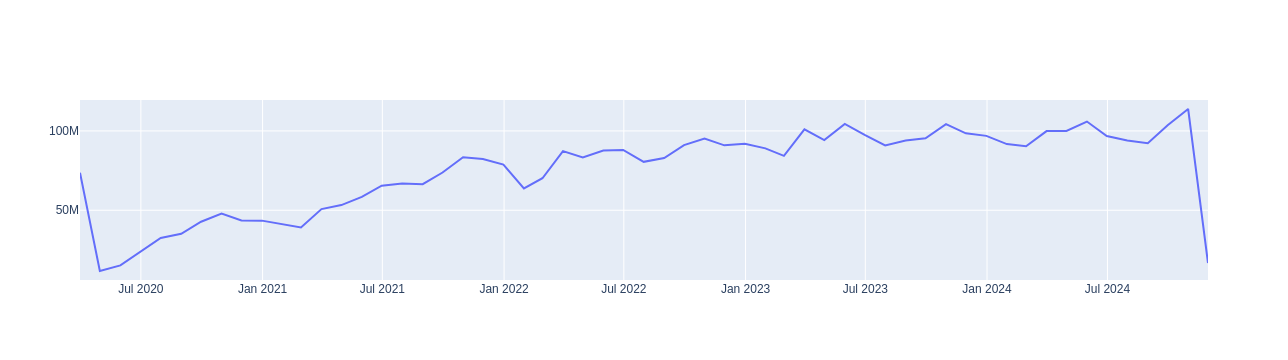

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_month["month-end"], y=df_month["Subways: Total Estimated Ridership"]))